## Import Required Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
# Reading Dataset
df = pd.read_json("../data/heart.json")

# displays the top 5 columns of the dataframe
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Understanding the Dataset

In [3]:
# no of rows and columns in the dataframe
df.shape

(918, 12)

In [4]:
# column names of the dataframe
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
# data types of each column in the dataframe
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
# basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# counting null values in each column of the dataframe
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# replacing 0's as 'No' & 1's as 'Yes' for "HeartDisease" column
df.HeartDisease.replace(to_replace={0: "No", 1: "Yes"}, inplace=True)
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
626,53,M,ASY,142,226,0,LVH,111,Y,0.0,Up,No


In [9]:
# replacing 0's as 'No' & 1's as 'Yes' for "FastingBS" column
df.FastingBS.replace(to_replace={0: "No", 1: "Yes"}, inplace=True)
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
406,57,M,ASY,140,0,Yes,Normal,100,Y,0.0,Flat,Yes


In [10]:
# count values of 'Sex' column 
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [11]:
# count values of 'ChestPainType' column
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [12]:
# count values of 'FastingBS' column
df.FastingBS.value_counts()

No     704
Yes    214
Name: FastingBS, dtype: int64

In [13]:
# count values of 'RestingECG' column
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [14]:
# count values of 'ExerciseAngina' column
df.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [15]:
# count values of 'ST_Slope' column
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [16]:
# count values of 'HeartDisease' column
df.HeartDisease.value_counts()

Yes    508
No     410
Name: HeartDisease, dtype: int64

In [17]:
# percentage of split between the categorical values
df.HeartDisease.value_counts(normalize=True)
# About 55% of the data is about people who have heart disease (Class - 1) 
# and remaining 45% of the data is about who didn't have heart disease (Class -0)

Yes    0.553377
No     0.446623
Name: HeartDisease, dtype: float64

In [18]:
# gives a brief summary stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


## Data Visualization

In [19]:
from scipy import stats
from statsmodels.api import qqplot
numberical_columns = ['Age', 'RestingBP', 'Cholesterol', 
                      'MaxHR', 'Oldpeak']
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 
                       'ExerciseAngina', 'ST_Slope', 'HeartDisease']

In [20]:
# function takes a single dataframe column name as argument and
# plots a 1 x 2 subplot contains (pie plot and bar plot)
def plot_categorial(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    df[col_name].value_counts().plot.pie(
        autopct="%.0f%%",
        shadow=True,
        ax=ax[0],
    )  # plots pie chart of given column with % percentage

    df[col_name].value_counts().plot.bar(
        ax=ax[1]
    )

    fig.suptitle(col_name.title())  # set plot's title
    plt.show()  # shows the plot

In [21]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][1], fill=True, cumulative=True
    )  # displays cumulative density plot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [22]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.boxplot(
        y=col_name, x="HeartDisease", data=df, ax=axes[0][0], palette="bright"
    )  # displays boxplot of the given dataframe column
    sns.violinplot(
        y=col_name, x="HeartDisease", data=df, ax=axes[0][1], split=True, palette="bright"
    )  # displays violinplot of the given dataframe column
    sns.swarmplot(
        y=col_name, x="HeartDisease", data=df, ax=axes[1][0], palette="bright"
    )  # displays swarmplot of the given dataframe columns
    sns.barplot(
        x=col_name, y="HeartDisease", data=df, hue="HeartDisease", palette="bright"
    )  # displays barplot of the given dataframe column respect to 'HeartDisease' column
    plt.suptitle(
        "Statistics of " + col_name
    )  # sets the title for the subplot as "Statistics of <column name>"
    plt.show()  # shows the plot

In [23]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        df, hue="HeartDisease", aspect=4, palette="bright"
    )  # sets a seaborn FacetGrid with hue = "HeartDisease" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "HeartDisease"
    facet.set(
        xlim=(0, df[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to HeartDisease"
    )  # sets the title for the plot as "<column name> respect to HeartDisease"
    plt.show()  # shows the plot

### Sex

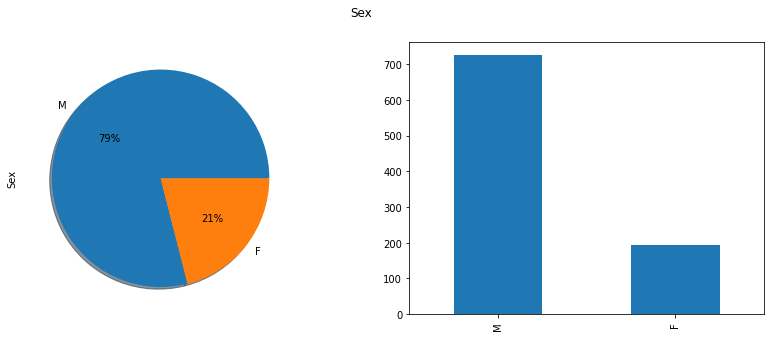

In [24]:
plot_categorial(categorical_columns[0])

### Chest Pain Type

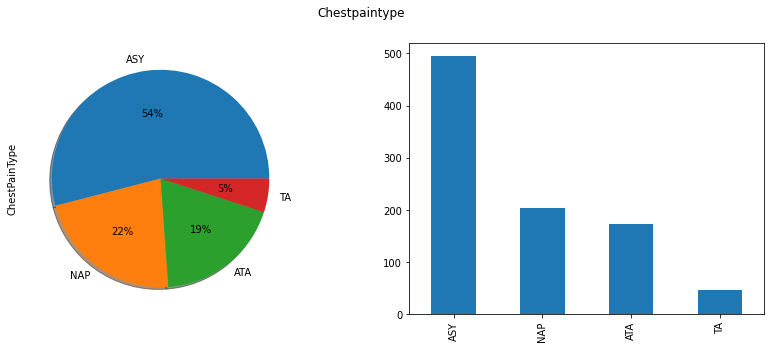

In [25]:
plot_categorial(categorical_columns[1])

### Fasting BS

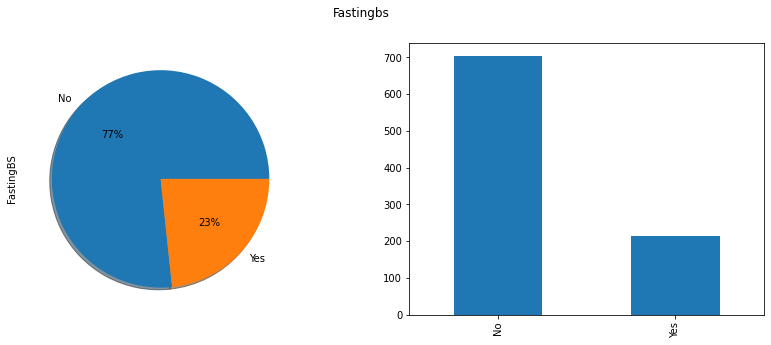

In [26]:
plot_categorial(categorical_columns[2])

### Resting ECG

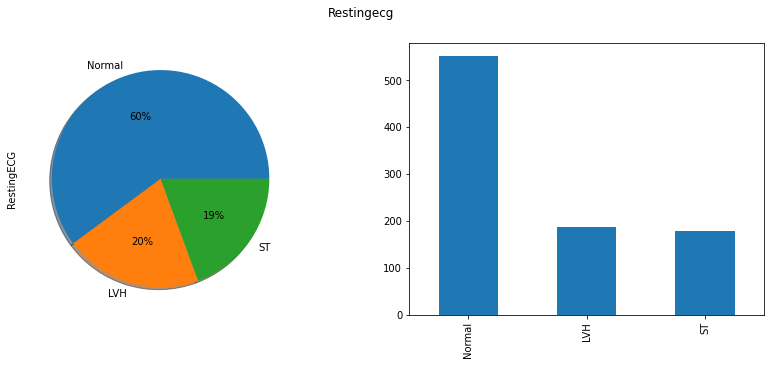

In [27]:
plot_categorial(categorical_columns[3])

### Exercise Angina

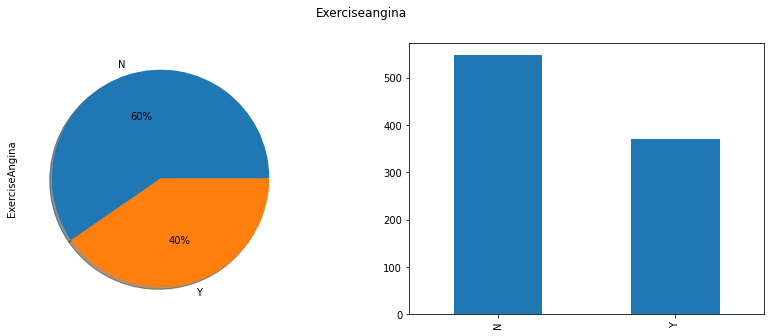

In [28]:
plot_categorial(categorical_columns[4])

### ST Slope

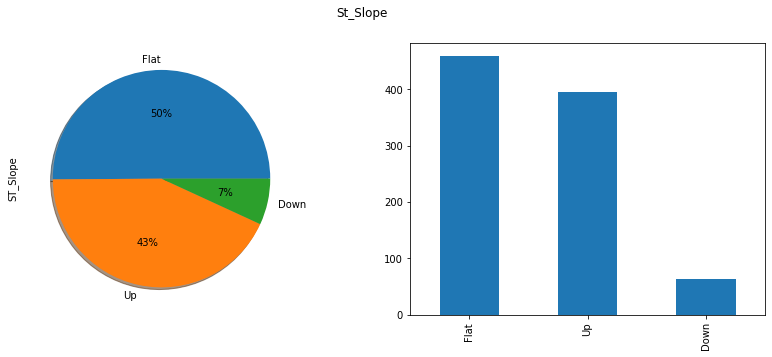

In [29]:
plot_categorial(categorical_columns[5])

### Heart Disease

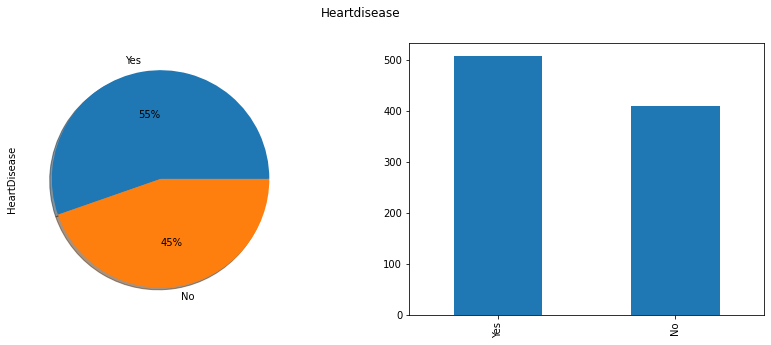

In [30]:
plot_categorial(categorical_columns[6])

### Age

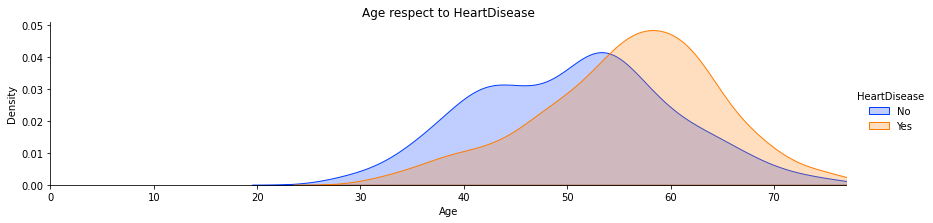

In [31]:
plot_kde(numberical_columns[0])

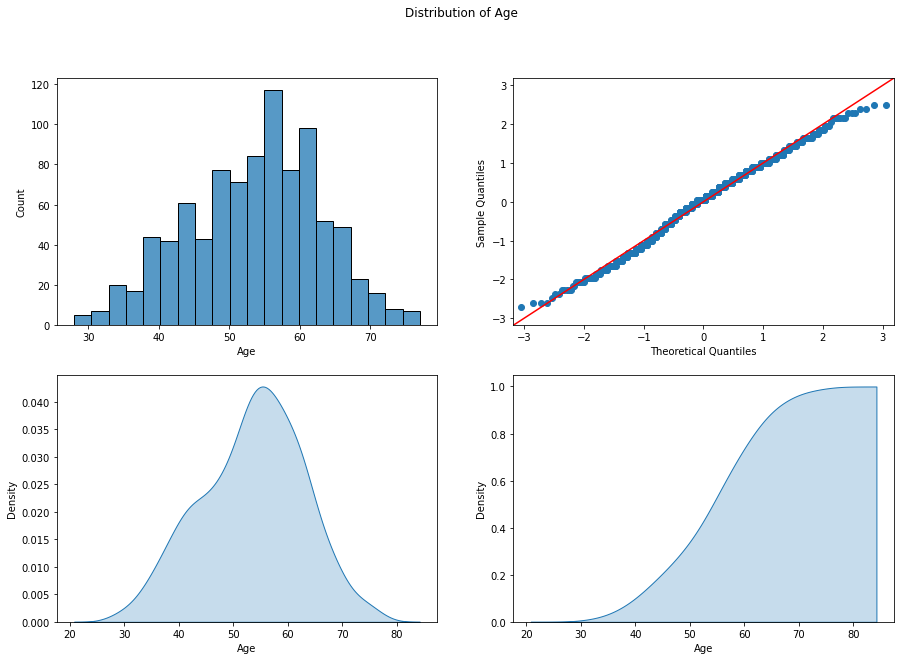

In [32]:
plot_distribution(numberical_columns[0])

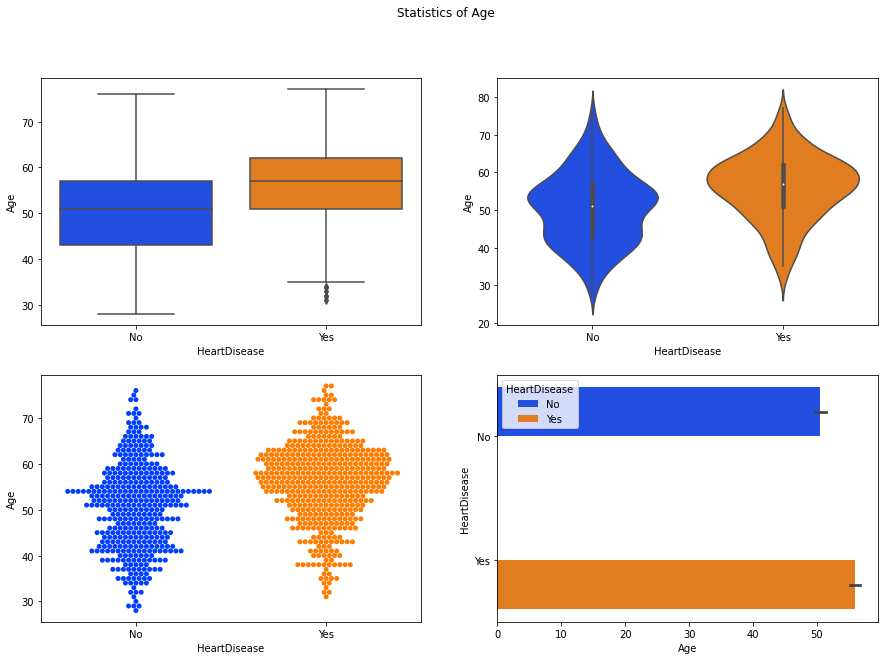

In [33]:
plot_stats(numberical_columns[0])

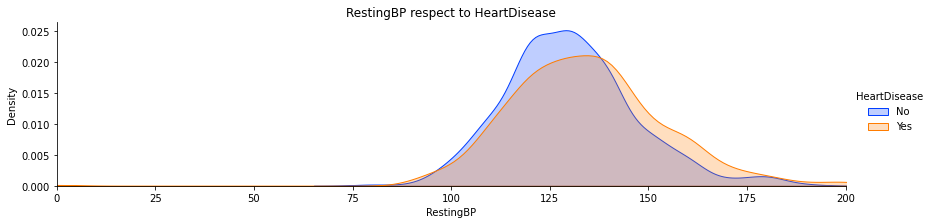

In [34]:
plot_kde(numberical_columns[1])

### Resting BP

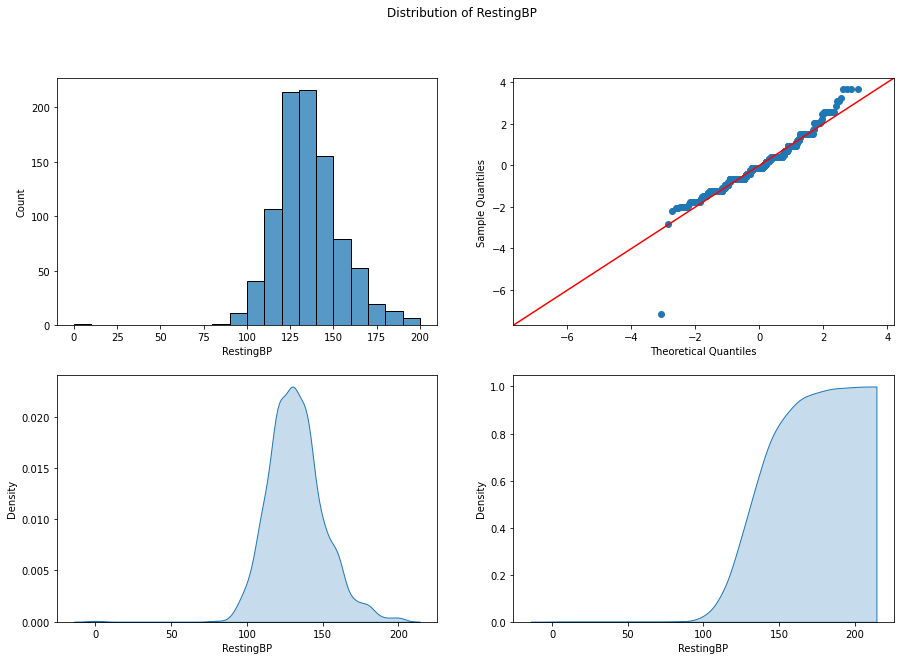

In [35]:
plot_distribution(numberical_columns[1])

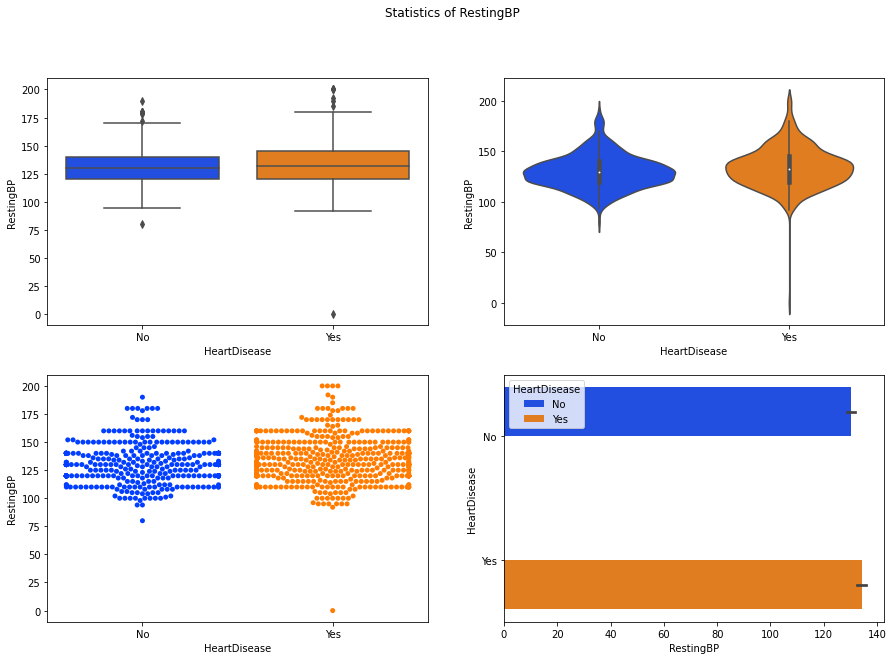

In [36]:
plot_stats(numberical_columns[1])

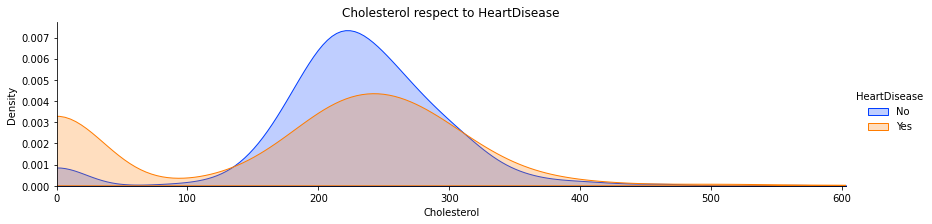

In [37]:
plot_kde(numberical_columns[2])

### Cholesterol

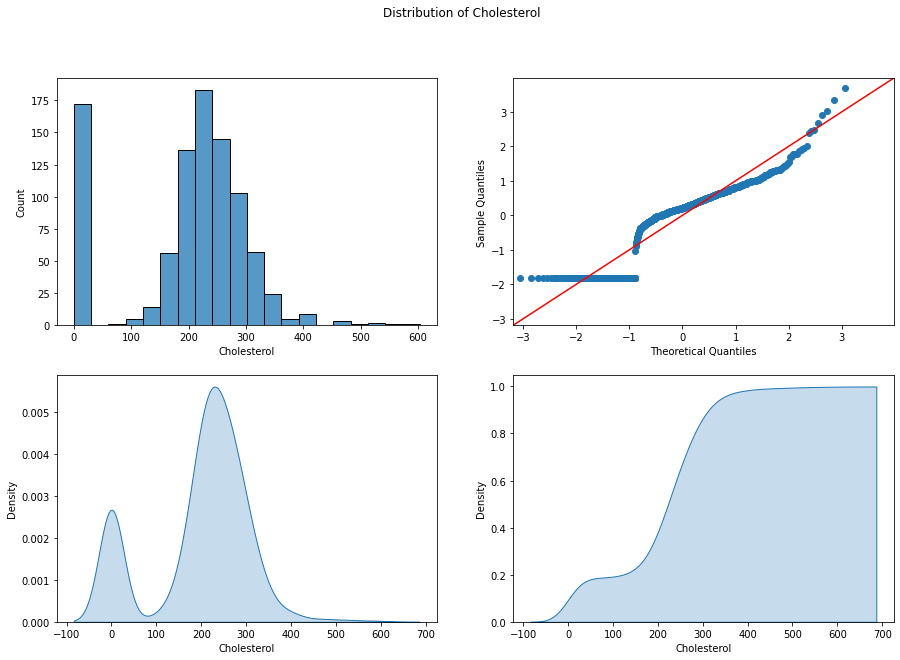

In [38]:
plot_distribution(numberical_columns[2])

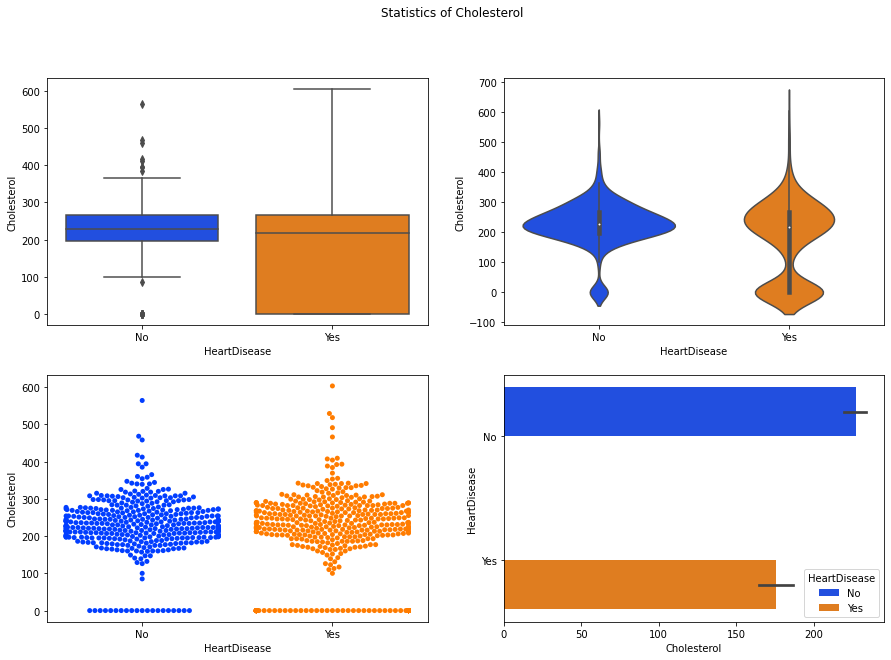

In [39]:
plot_stats(numberical_columns[2])

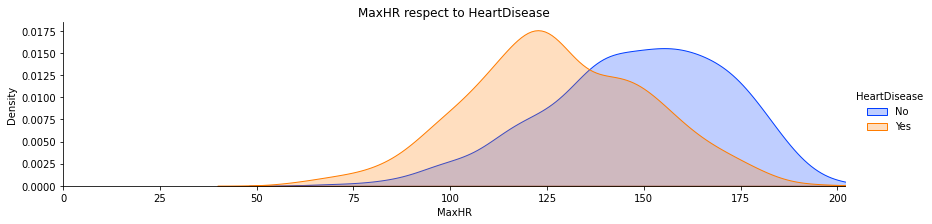

In [40]:
plot_kde(numberical_columns[3])

### MaxHR

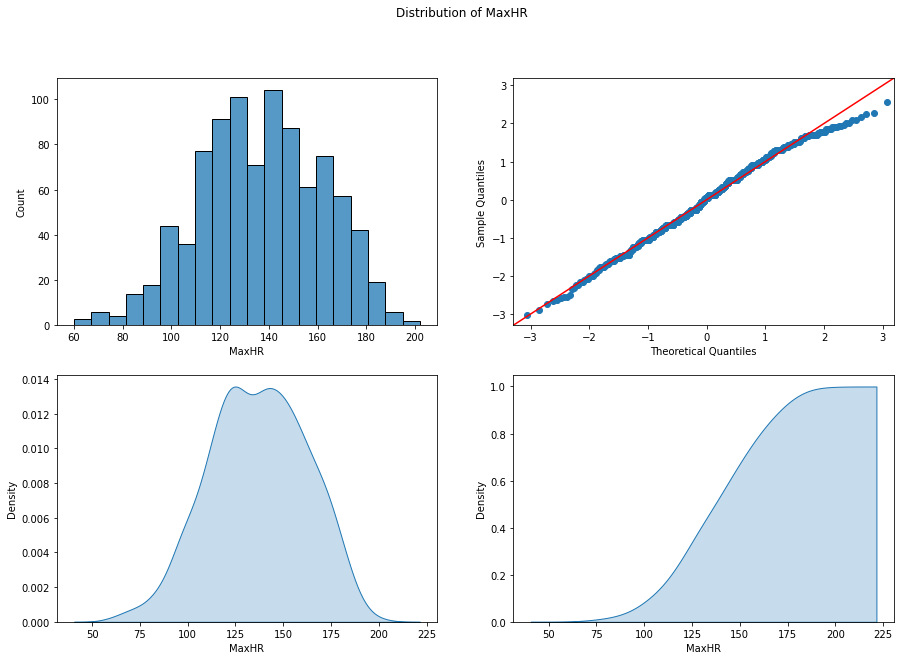

In [41]:
plot_distribution(numberical_columns[3])

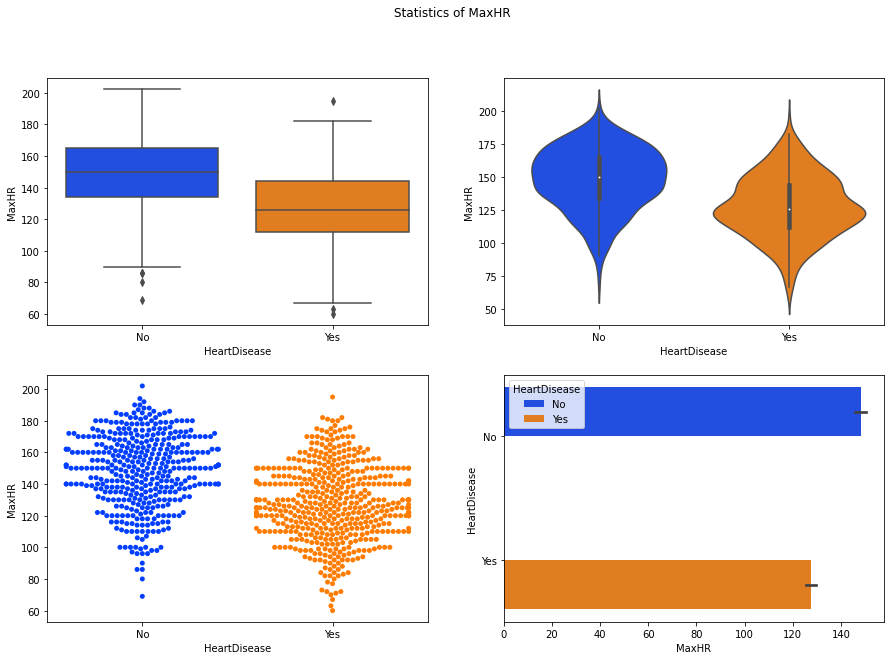

In [42]:
plot_stats(numberical_columns[3])

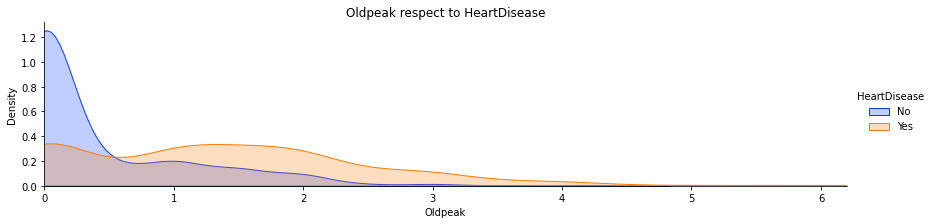

In [43]:
plot_kde(numberical_columns[4])

### Old Peak

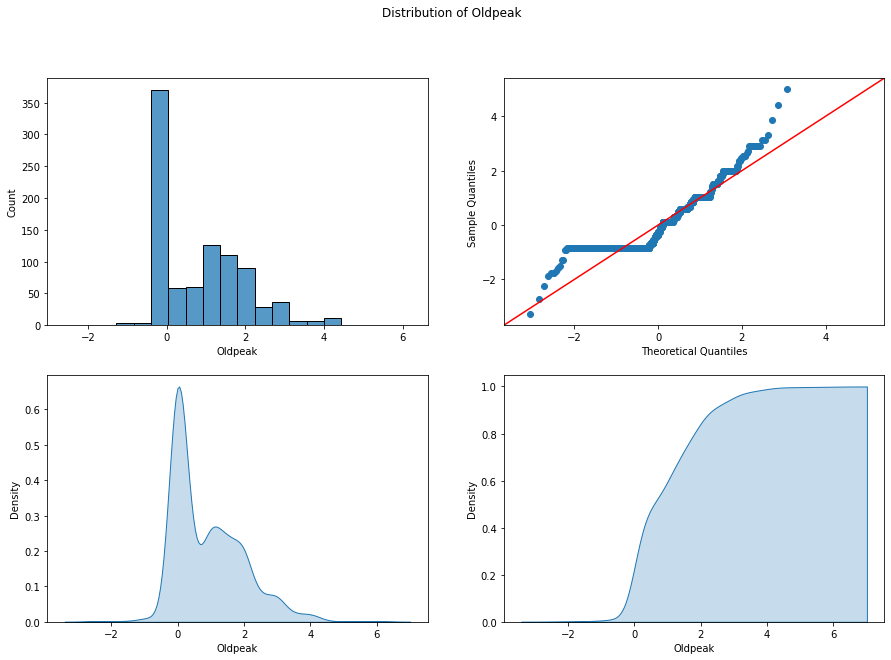

In [44]:
plot_distribution(numberical_columns[4])

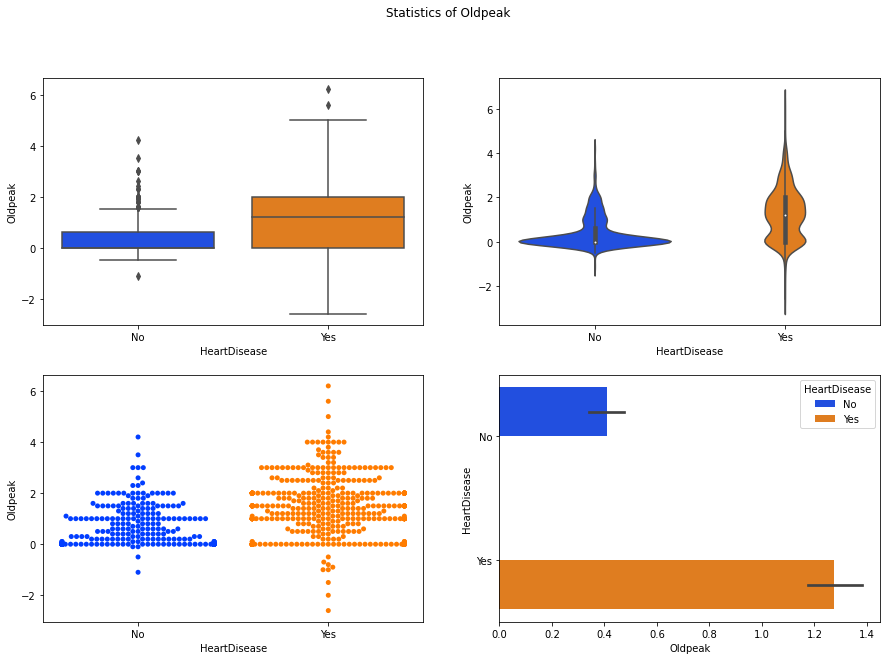

In [45]:
plot_stats(numberical_columns[4])

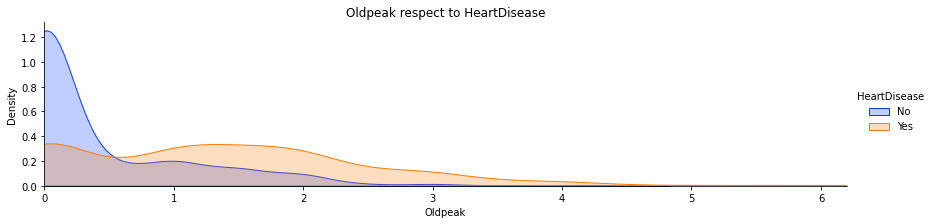

In [46]:
plot_kde(numberical_columns[4])

### Pair Plot

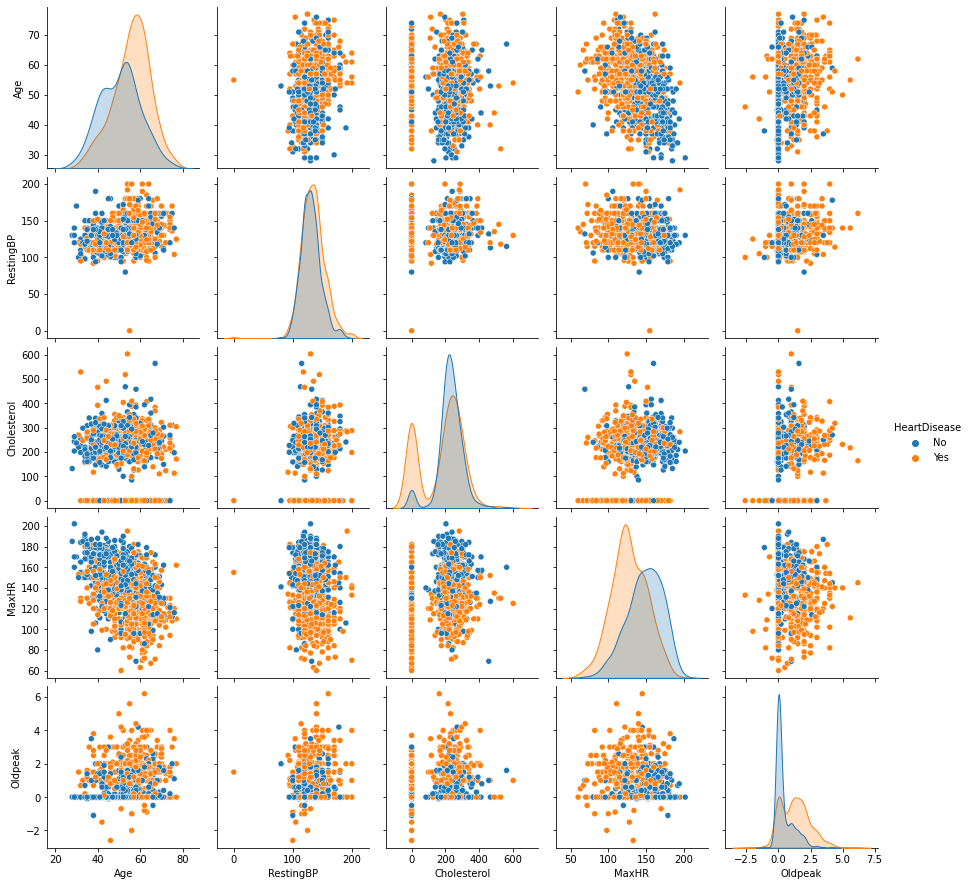

In [47]:
sns.pairplot(
    df,
    hue="HeartDisease",
    x_vars=numberical_columns
)  # pairplot with given columns in x axis and all columns in y axis
plt.show()  # shows the plot

### Observations after EDA:
1. Males are consistently more likely to have heart disease.
2. Inidividuals with ASY chest pain are consistently more likely to have heart disease. 
3. Flat and down ST_Slope have higher HeartDisease rate while Up ST_Slope has lower HeartDisease rate.
4. People with higher oldpeak tend to have exercise engima. There is no obvious trend with other categorical variables
5. Cholesterol seem to be higher in females and people with low fasting blood sugar, though the difference looks small.
6. Most of heart disease Patients have age between 55 and 65
7. Most patients with 0 oldpeak, don't have Heart disease
8. Most tested Patients have RestingBP between 120 and 150

## Feature Engineering

In [48]:
def frequency_encoding(df, var):
    encoded_feature = df[var].value_counts().to_dict()
    df[var] = df[var].map(encoded_feature)

for col in ['ChestPainType', 'RestingECG', 'ST_Slope']:
    frequency_encoding(df, col)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,173,140,289,No,552,172,N,0.0,395,No
1,49,F,203,160,180,No,552,156,N,1.0,460,Yes
2,37,M,173,130,283,No,178,98,N,0.0,395,No
3,48,F,496,138,214,No,552,108,Y,1.5,460,Yes
4,54,M,203,150,195,No,552,122,N,0.0,395,No


In [49]:
# replacing 'No' as '0' & 'Yes' as 1
df.Sex.replace(to_replace={"F": 0, "M": 1}, inplace=True)
df.FastingBS.replace(to_replace={"No": 0, "Yes": 1}, inplace=True)
df.ExerciseAngina.replace(to_replace={"N": 0, "Y": 1}, inplace=True)
df.HeartDisease.replace(to_replace={"No": 0, "Yes": 1}, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,173,140,289,0,552,172,0,0.0,395,0
1,49,0,203,160,180,0,552,156,0,1.0,460,1
2,37,1,173,130,283,0,178,98,0,0.0,395,0
3,48,0,496,138,214,0,552,108,1,1.5,460,1
4,54,1,203,150,195,0,552,122,0,0.0,395,0


## Correlation

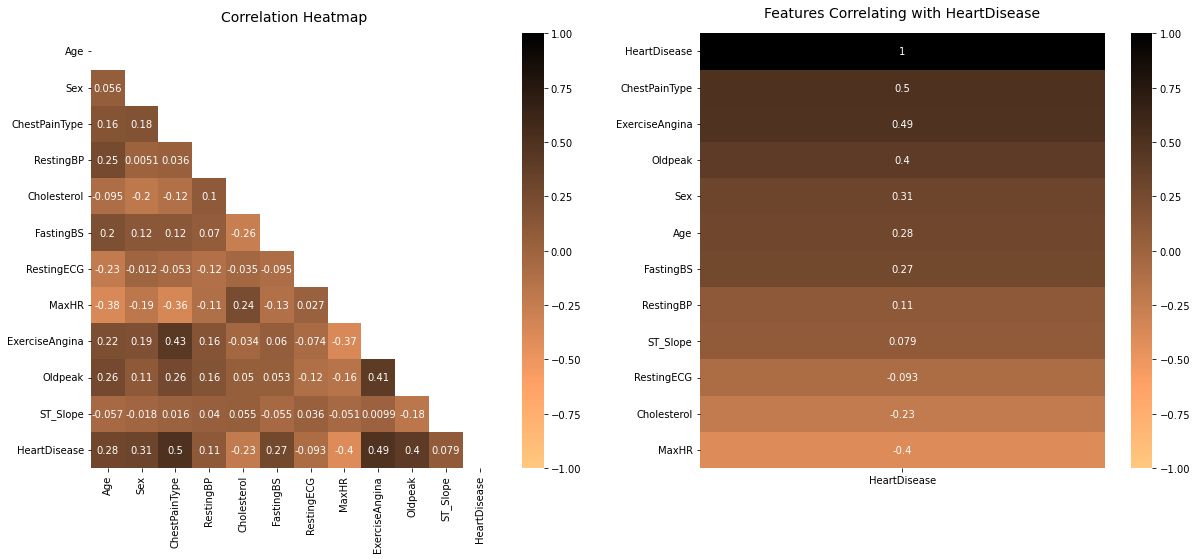

In [50]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))  # create a 1 x 2 subplot grid
resign_corr = df.corr()  # calculate correlation of the dataframe
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(
    df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="copper_r"
)  # cornor heatmap of the dataframe correlation
cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)  # sets the title for the heatmap with font size 14 and padding 12

heatmap = sns.heatmap(
    resign_corr[["HeartDisease"]].sort_values(by="HeartDisease", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="copper_r",
)  # create heatmap for features correlating with the dependant varibale 'HeartDisease'
heatmap.set_title(
    "Features Correlating with HeartDisease",
    fontdict={"fontsize": 14},
    pad=16,  # sets the title for the heatmap with font size 14 and padding 16
)
plt.show()  # shows the subplot

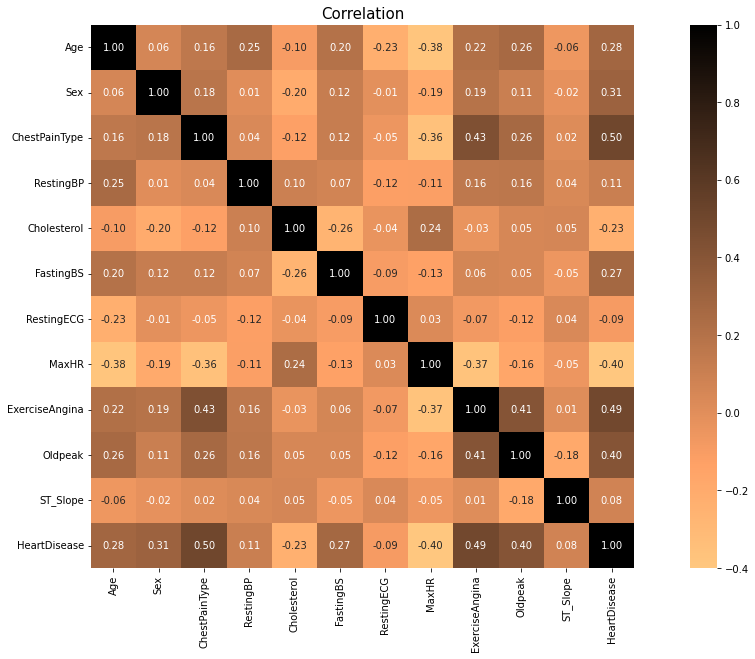

In [51]:
# create a pearson correlation heatmap with figure size (20, 10)
plt.figure(figsize=(20, 10))
sns.heatmap(resign_corr, annot=True, fmt=".2f", square=True, cmap="copper_r")
plt.title("Correlation", size=15)
plt.show()

## Data Splitting

In [52]:
X = df.drop(["HeartDisease"], axis=1)  # X contains all independant variables
y = df["HeartDisease"]  # Y contains only the dependant variable

In [53]:
X[:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,173,140,289,0,552,172,0,0.0,395
1,49,0,203,160,180,0,552,156,0,1.0,460
2,37,1,173,130,283,0,178,98,0,0.0,395
3,48,0,496,138,214,0,552,108,1,1.5,460
4,54,1,203,150,195,0,552,122,0,0.0,395


In [54]:
y[:5]

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

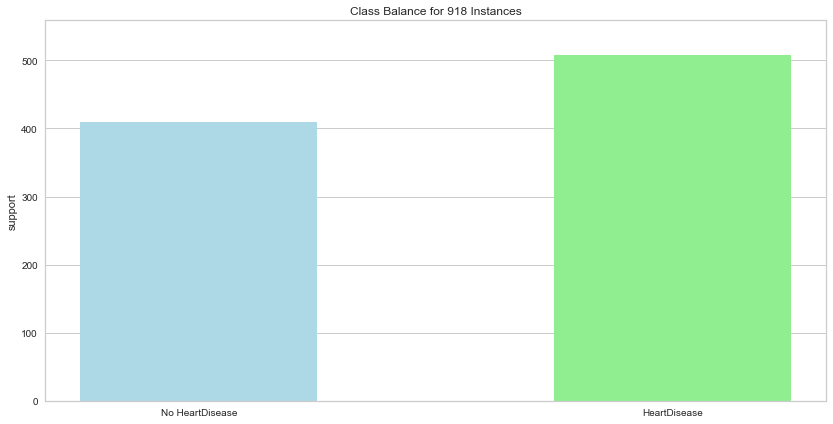

In [55]:
# Class balance between dependant column 'HeartDisease' values
from yellowbrick.target import ClassBalance

classes = ["No HeartDisease", "HeartDisease"]
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

### Sampling Imbalanced Data

In [56]:
# Class balance between dependant variable is imbalanced
from imblearn import combine

smt = combine.SMOTETomek(
    random_state=14
)  # To make the dependant variable balanced using SMOTETomek method
X, y = smt.fit_resample(X, y)  # resampling the dataset

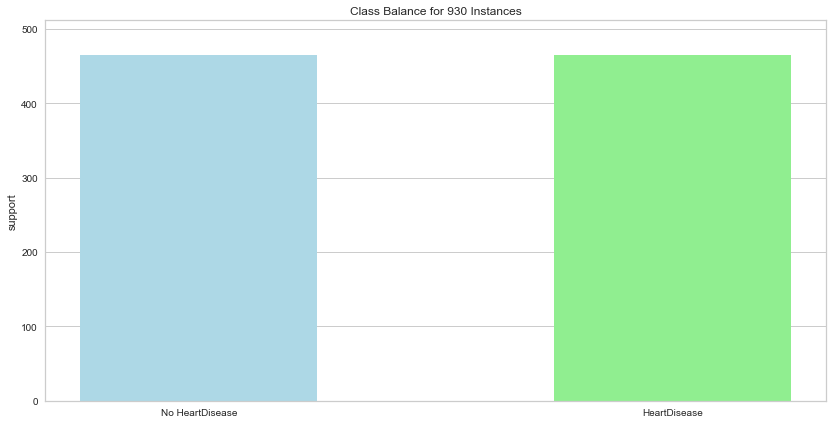

In [57]:
# Class balance between dependant variable is much more balanced now..
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

### Feature Selection

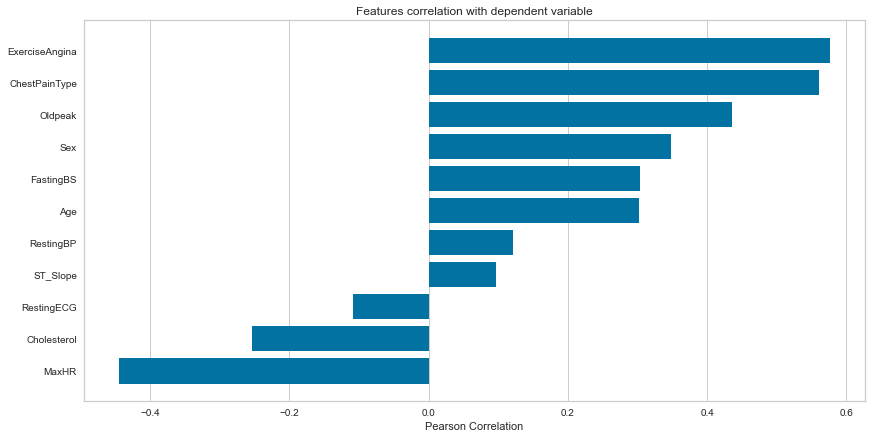

In [58]:
# displays the Features correlation with dependant variable 'HeartDisease' as a barplot using pearson correlation method
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="pearson", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

In [59]:
X.drop(['RestingECG', 'MaxHR', 'Cholesterol'], axis=1, inplace=True)
X.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,173,140,0,0,0.0,395
1,49,0,203,160,0,0,1.0,460
2,37,1,173,130,0,0,0.0,395
3,48,0,496,138,0,1,1.5,460
4,54,1,203,150,0,0,0.0,395


In [60]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

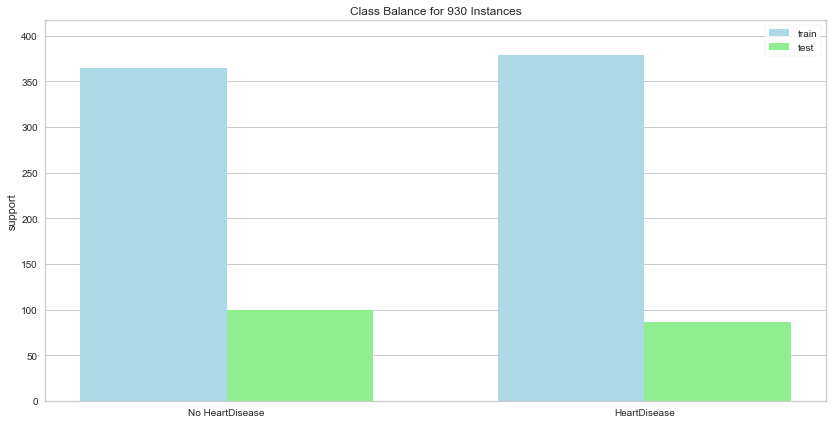

In [61]:
# displays Class balance between training & testing sets
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y_train, y_test)
viz.show()
plt.show()

## Model Fitting

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

In [63]:
# fitting the random forest model
rf_clf = RandomForestClassifier(n_estimators=20, random_state=0).fit(X_train, y_train)

In [64]:
y_pred = rf_clf.predict(X_test)

**Classification Accuracy:**

In [65]:
print(accuracy_score(y_test, y_pred))

0.9086021505376344


**Classification Error:**

In [66]:
print(1 - accuracy_score(y_test, y_pred))

0.09139784946236562


**Sensitivity/True Positive Rate/Recall Score**

In [67]:
print(recall_score(y_test, y_pred))

0.9186046511627907


**Precision Score:**

In [68]:
print(precision_score(y_test, y_pred))

0.8876404494382022


**F1 Score**

In [69]:
print(f1_score(y_test, y_pred))

0.9028571428571427


**Class Prediction Error**

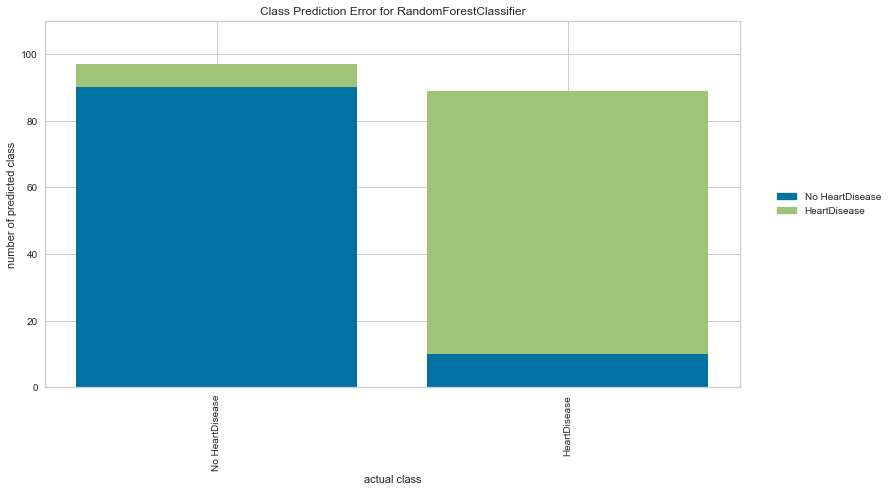

In [70]:
from yellowbrick.classifier import class_prediction_error

plt.figure(figsize=(14, 7))
visualizer = class_prediction_error(
    rf_clf, X_train, y_train, X_test, y_test, classes=classes
)
visualizer.show()
plt.show()

**ROC Curve**

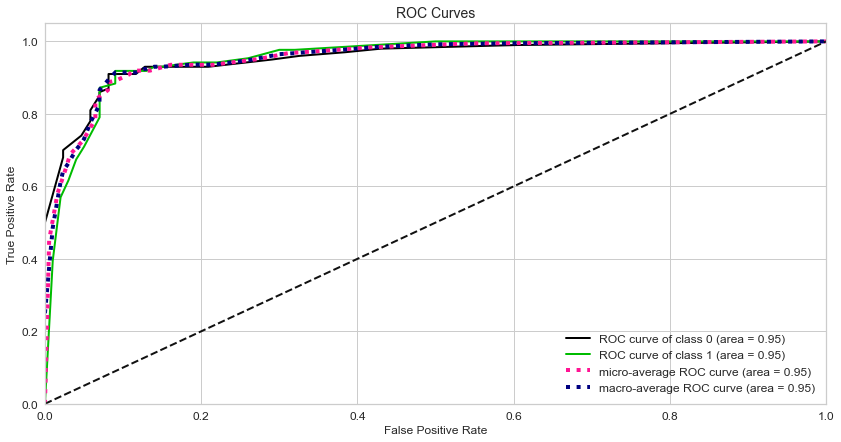

In [71]:
from scikitplot.metrics import (
    plot_cumulative_gain,
    plot_lift_curve,
    plot_roc,
    plot_precision_recall,
    plot_confusion_matrix,
)
from scikitplot.estimators import plot_learning_curve

y_probas = rf_clf.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Precision Recall Curve**

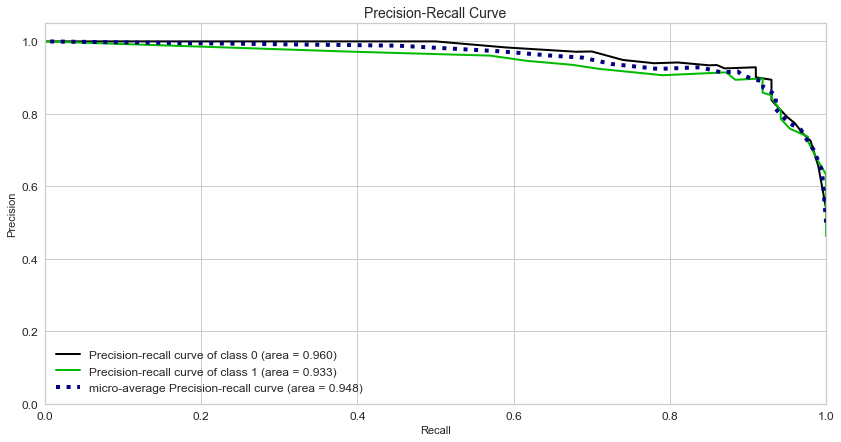

In [72]:
from scikitplot.metrics import plot_precision_recall

plot_precision_recall(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Learning Curve**

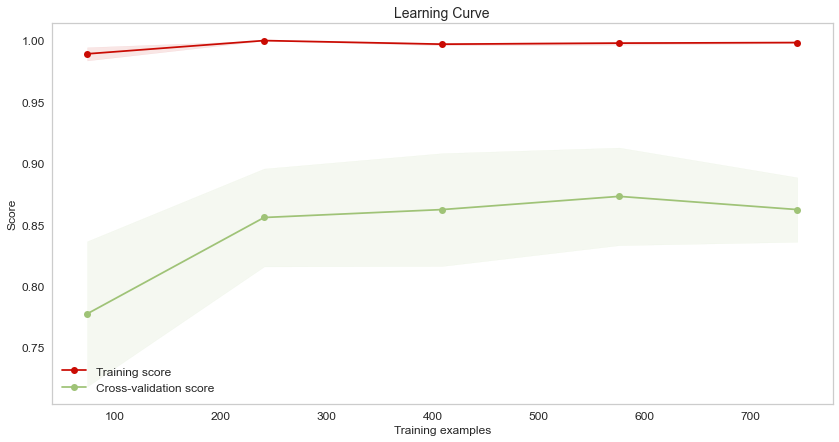

In [73]:
plot_learning_curve(rf_clf, X, y, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Lift Curve**

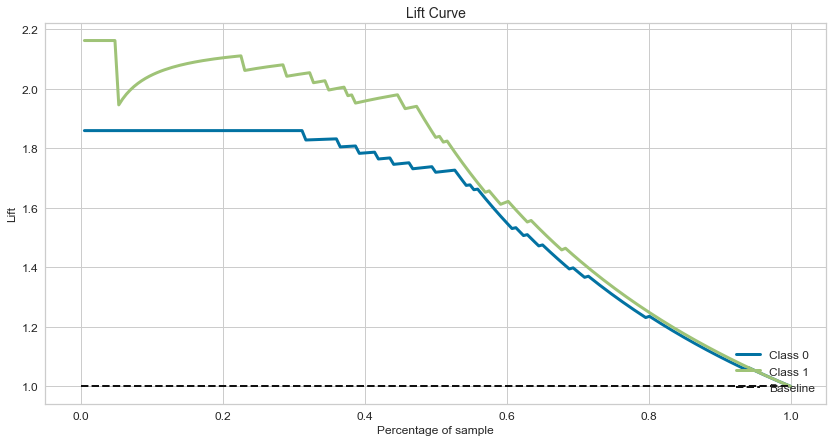

In [74]:
from scikitplot.metrics import plot_lift_curve

plot_lift_curve(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Cumulative Gains Curve**

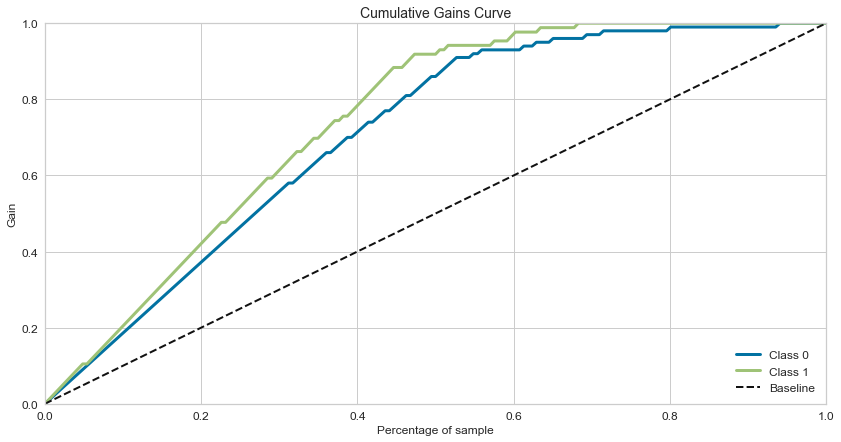

In [75]:
plot_cumulative_gain(
    y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Confusion Matrix**

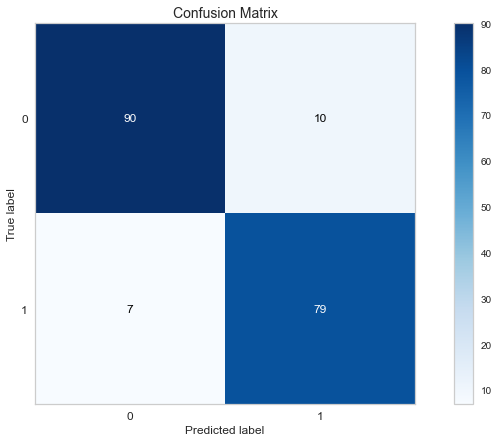

In [76]:
plot_confusion_matrix(
    y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

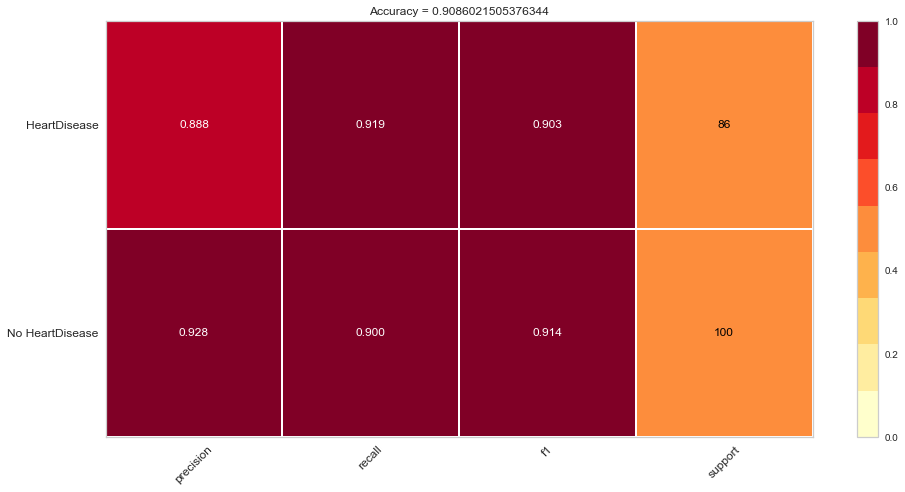

In [77]:
from yellowbrick.classifier import classification_report

plt.figure(figsize=(14, 7))
visualizer = classification_report(
    rf_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=classes,
    support=True,
    title=f"Accuracy = {str(accuracy_score(y_test, y_pred))}"
)
plt.show()

### Predictions

In [78]:
# function to predict using the trained model
def predict_heartdisease(
    Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
):
    Sex = 1 if Sex == "Male" else 0
    FastingBS = 1 if FastingBS == "Yes" else 0
    ExerciseAngina = 1 if ExerciseAngina == "Yes" else 0
    if ChestPainType == "ASY":
        ChestPainType = 496
    elif ChestPainType == "NAP":
        ChestPainType = 203
    elif ChestPainType == "ATA":
        ChestPainType = 173
    else:
        ChestPainType = 46
    if ST_Slope == "Flat":
        ST_Slope = 460
    elif ST_Slope == "Up":
        ST_Slope = 395
    else:
        ST_Slope = 63
    x = [[Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope]]
    return rf_clf.predict(x)

In [79]:
# Prediction 1
# Input sequence: Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
prediction = predict_heartdisease(37, "Male", "ASY", 130, "Yes", "Yes", 1.0, "Up")[0]
print("Oops! You have Heart Disease." if prediction else "Great! You don't have Heart Disease.")

Oops! You have Heart Disease.


In [80]:
# Prediction 2
# Input sequence: Age, Sex, ChestPainType, RestingBP, FastingBS, ExerciseAngina, Oldpeak, ST_Slope
prediction = predict_heartdisease(37, "Feale", "NAP", 110, "Yes", "Yes", 1.0, "Up")[0]
print("Oops! You have Heart Disease." if prediction else "Great! You don't have Heart Disease.")

Great! You don't have Heart Disease.


### Saving the Model

In [81]:
import os
import joblib

if not os.path.exists("../models/"):
    os.mkdir("../models/")
# dump trained model as pickle file
joblib.dump(rf_clf, "../models/model.pkl")
print("Successfully Completed !")

Successfully Completed !
